# Music Analysis with Librosa

## Blake Crowther

### Objectives
- Install and configure Librosa
- Load and analyze audio files with Librosa
- Extract relevant features of audio files
- Learn from features extracted using Librosa
- Scale learning to develop accurate genre classification model
- Predict and assign genre's to my existing music catalog

### Free Music Archive (FMA): https://github.com/mdeff/fma

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import eyed3
from IPython.display import Audio

In [2]:
# Load and analyze first song
song_1_filepath = './ODESZA - Bloom (Lane 8 Remix).mp3'
song_1_fileinfo = eyed3.load(song_1_filepath) 
song_1_title = song_1_fileinfo.tag.title
song_1_artist = song_1_fileinfo.tag.artist
y1, sr1 = librosa.load(song_1_filepath, sr=None)
print(f'Successfully loaded: {song_1_title}')

# Load and analyze second song
song_2_filepath = './Dom Dolla - San Frandisco (Clean Radio Edi-1.mp3'
song_2_fileinfo = eyed3.load(song_2_filepath)
song_2_title = song_2_fileinfo.tag.title
song_2_artist = song_2_fileinfo.tag.artist
y2, sr2 = librosa.load(song_2_filepath, sr=None)
print(f'Successfully loaded: {song_2_title}')

Lame tag CRC check failed


Successfully loaded: ODESZA - Bloom (Lane 8 Remix)
Successfully loaded: San Frandisco (Clean Radio Edit)


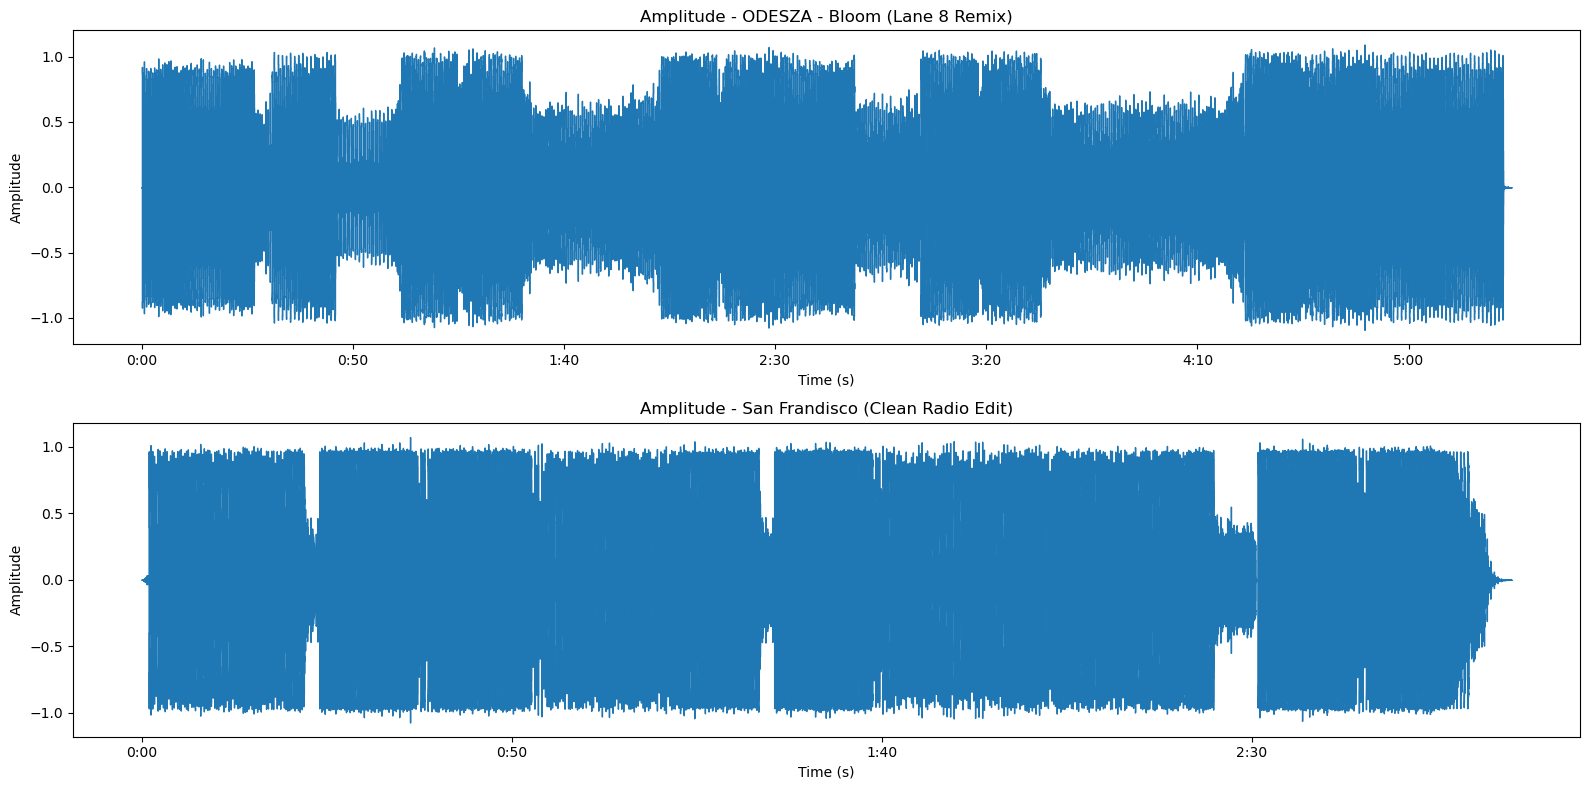

In [3]:
# Plot both amplitudes over time in subplot
plt.figure(figsize=(16, 8))

# Plot amplitude of song 1
plt.subplot(2, 1, 1)
librosa.display.waveshow(y1, sr=sr1)
plt.title(f'Amplitude - {song_1_title}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot amplitude of song 2
plt.subplot(2, 1, 2)
librosa.display.waveshow(y2, sr=sr2)
plt.title(f'Amplitude - {song_2_title}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



In [4]:
start_time = 15
end_time = 40

# Preview audio of song 1 from start time to end time
audio_snippet_1 = y1[int(start_time * sr1):int(end_time * sr1)]

print(f'Audio preview of {song_1_title}')
Audio(data=audio_snippet_1, rate=sr1)

Audio preview of ODESZA - Bloom (Lane 8 Remix)


In [5]:
# Preview audio of song 2 from start time to end time
audio_snippet_2 = y2[int(start_time * sr2):int(end_time * sr2)]

print(f'Audio preview of {song_2_title}')
Audio(data=audio_snippet_2, rate=sr2)   

Audio preview of San Frandisco (Clean Radio Edit)


Original min pitch intesity: 0.0
Original max pitch intesity: 1.0
Resampled min pitch intesity: 0.0
Resampled max pitch intesity: 1.0
0.0 1.0


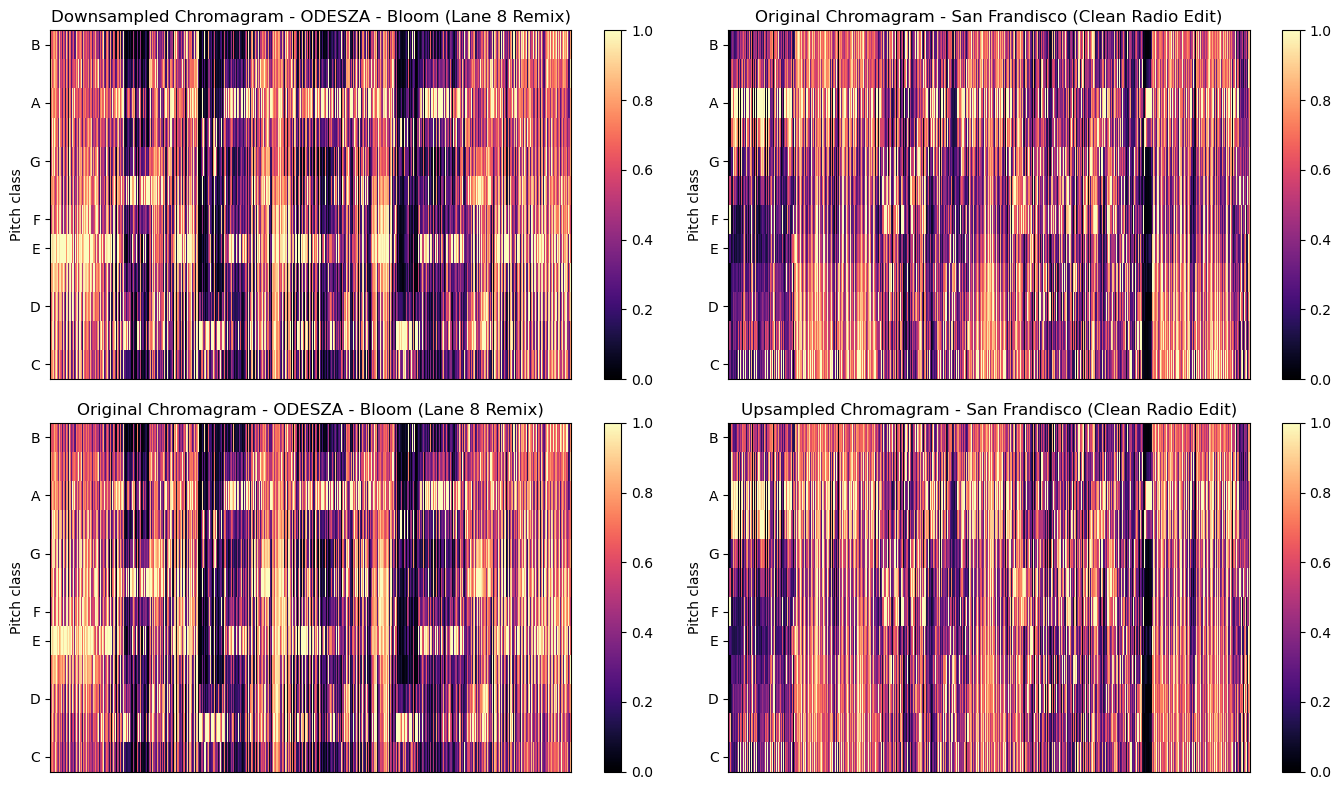

In [6]:
# Compute and analyze chromagram
chroma1 = librosa.feature.chroma_stft(y=y1, sr=sr1)
chroma2 = librosa.feature.chroma_stft(y=y2, sr=sr2)

plt.figure(figsize=(14,8))
vmin = min(np.min(chroma1), np.min(chroma2))
vmax = max(np.max(chroma1), np.max(chroma2))
print(f'Original min pitch intesity: {vmin}')
print(f'Original max pitch intesity: {vmax}')

if sr1 == sr2:
    # Plot original chromagram feature matrix of song 1
    plt.subplot(1, 2, 1)
    librosa.display.specshow(chroma1, y_axis='chroma', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(f'Original Chromagram - {song_1_title}')

    # Plot original chromagram feature matrix of song 2
    plt.subplot(1, 2, 2)
    librosa.display.specshow(chroma2, y_axis='chroma', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(f'Original Chromagram - {song_2_title}')

    plt.tight_layout()
    plt.show()
else:
    # Resample chroma feature matrices if sample rates differ
    if sr1 < sr2:
        # Downsample song 2 to match sample rate of song 1
        downsampled_series2 = librosa.core.resample(y2, orig_sr=sr2, target_sr=sr1)
        downsampled_chroma2 = librosa.feature.chroma_stft(y=downsampled_series2, sr=sr1)
        
        # Upsample song 1 to match sample rate of song 2
        upsampled_series1 = librosa.core.resample(y1, orig_sr=sr1, target_sr=sr2)
        upsampled_chroma1 = librosa.feature.chroma_stft(y=upsampled_series1, sr=sr2)
        
        # Calculate min and max values across all four chromagrams
        vmin = min(vmin, np.min(downsampled_chroma2), np.min(upsampled_chroma1))
        vmax = max(vmax, np.max(downsampled_chroma2), np.max(upsampled_chroma1))
        print(f'Resampled min pitch intesity: {vmin}')
        print(f'Resampled max pitch intesity: {vmax}')
        
        # Plot chromagram feature matrix of song 1
        plt.subplot(2, 2, 1)
        librosa.display.specshow(chroma1, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Original Chromagram - {song_1_title}')     
        
        # Plot downsampled chromagram feature matrix of song 2
        plt.subplot(2, 2, 2)
        librosa.display.specshow(downsampled_chroma2, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Downsampled Chromagram - {song_2_title}')
        
        # Plot upsampled chromagram feature matrix of song 1
        plt.subplot(2, 2, 3)
        librosa.display.specshow(upsampled_chroma1, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Upsampled Chromagram - {song_1_title}')     
        
        # Plot chromagram feature matrix of song 2
        plt.subplot(2, 2, 4)
        librosa.display.specshow(chroma2, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Original Chromagram - {song_2_title}')
        
        plt.tight_layout()
        plt.show()
    
    elif sr1 > sr2:
        # Downsample song 1 to match sample rate of song 2
        downsampled_series1 = librosa.core.resample(y1, orig_sr=sr1, target_sr=sr2)
        downsampled_chroma1 = librosa.feature.chroma_stft(y=downsampled_series1, sr=sr2)
        
        # Upsample song 2 to match sample rate of song 1
        upsampled_series2 = librosa.core.resample(y2, orig_sr=sr2, target_sr=sr1)
        upsampled_chroma2 = librosa.feature.chroma_stft(y=upsampled_series2, sr=sr1)
        
        # Calculate min and max values across all four chromagrams
        vmin = min(vmin, np.min(downsampled_chroma1), np.min(upsampled_chroma2))
        vmax = max(vmax, np.max(downsampled_chroma1), np.max(upsampled_chroma2)) 
        print(f'Resampled min pitch intesity: {vmin}')
        print(f'Resampled max pitch intesity: {vmax}') 
        
        # Plot downsampled chromagram feature matrix of song 1
        plt.subplot(2, 2, 1)
        librosa.display.specshow(downsampled_chroma1, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Downsampled Chromagram - {song_1_title}')     
        
        # Plot chromagram feature matrix of song 2
        plt.subplot(2, 2, 2)
        librosa.display.specshow(chroma2, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Original Chromagram - {song_2_title}')
        
        # Plot chromagram feature matrix of song 1
        plt.subplot(2, 2, 3)
        librosa.display.specshow(chroma1, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Original Chromagram - {song_1_title}')     
        
        # Plot upsampled chromagram feature matrix of song 2
        plt.subplot(2, 2, 4)
        librosa.display.specshow(upsampled_chroma2, y_axis='chroma', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f'Upsampled Chromagram - {song_2_title}')     

        print(vmin, vmax)
        plt.tight_layout()
        plt.show()

## Lets *Learn*

#### Learning from our librosa feature extraction with PyTorch

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os

from MusicClassifier import MusicClassifier
from MusicDataset import MusicDataset

### Model Preprocessing

In [17]:
def extract_features(file_path):
    '''Extract features of file_path or return None upon exception'''
    if os.path.exists(file_path):
        try: 
            y, sr = librosa.load(file_path)
            # Extract Chromagram
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            # Extract MFCCs
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            # Extract Tempo
            tempo, _ = librosa.feature.rhythm.tempo(y=y, sr=sr)
            print(tempo)
            # Concatenate features
            features = np.concatenate((chroma, mfccs))
            return features
        except Exception as e: 
            return None
    return None

training_genre_map = {
    "Dom Dolla - San Frandisco (Clean Radio Edi-1.mp3": "Tech House",
    "Noizu & Eli Brown - Inside My Head (Clean Extended).mp3": "Tech House",
    "Chris Lake ft Alexis Roberts - Turn Off The .mp3": "Future House",
    "Odesza - Late Night (Clean) (Extended).mp3": "Electronica",
    "Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3": "Hip Hop",
    "Daddy Yankee - Shaky Shaky (Clean).mp3": "Reggaeton"
}

genre_to_index = {
    "Tech House": 0,
    "Future House": 1,
    "Electronica": 2,
    "Hip Hop": 3,
    "Reggaeton": 4,
}
index_to_genre = {index: genre for genre, index in genre_to_index.items()}
num_classes = len(genre_to_index)

X = [] # Features
y = [] # Labels

for file_path, label in training_genre_map.items():
    features = extract_features(file_path)
    X.append(features)
    y.append(label)

# Find the maximum length of features
# max_length = max(feature.shape[1] for feature in X)
print(X[0].shape)

AttributeError: 'NoneType' object has no attribute 'shape'

### Model Training

In [9]:
# Create a PyTorch dataset
music_dataset = MusicDataset(features=X, labels=y, genre_to_index=genre_to_index, max_length=max_length, num_classes=num_classes)

# Define the neural network and other training parameters
input_size = music_dataset.features[0].shape[1]
model = MusicClassifier(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define a data loader
batch_size = 4
data_loader = DataLoader(music_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 250

for epoch in range(num_epochs):
    for inputs, labels_one_hot in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/250, Loss: 581.945556640625
Epoch 2/250, Loss: 147.12643432617188
Epoch 3/250, Loss: 375.825927734375
Epoch 4/250, Loss: 140.127685546875
Epoch 5/250, Loss: 112.20063781738281
Epoch 6/250, Loss: 81.95132446289062
Epoch 7/250, Loss: 56.35602951049805
Epoch 8/250, Loss: 52.366249084472656
Epoch 9/250, Loss: 22.677085876464844
Epoch 10/250, Loss: 10.15083122253418
Epoch 11/250, Loss: 36.22473907470703
Epoch 12/250, Loss: 6.373568534851074
Epoch 13/250, Loss: 19.908451080322266
Epoch 14/250, Loss: 18.980194091796875
Epoch 15/250, Loss: 10.16997241973877
Epoch 16/250, Loss: 10.629554748535156
Epoch 17/250, Loss: 6.331307888031006
Epoch 18/250, Loss: 2.572537660598755
Epoch 19/250, Loss: 2.4138600826263428
Epoch 20/250, Loss: 2.8278825283050537
Epoch 21/250, Loss: 2.502845287322998
Epoch 22/250, Loss: 2.2481250762939453
Epoch 23/250, Loss: 2.522784471511841
Epoch 24/250, Loss: 3.458186388015747
Epoch 25/250, Loss: 2.5556650161743164
Epoch 26/250, Loss: 14.532590866088867
Epoch 27/250

### Model Evaluation

In [10]:
# Test tracks
test_features = {
    "Odesza - Late Night (Clean) (Extended).mp3": extract_features("./Odesza - Late Night (Clean) (Extended).mp3"),
    "Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3": extract_features("./Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3"),
    "Free Your Body (Noizu Remix).mp3": extract_features("./Free Your Body (Noizu Remix).mp3"),
    "Daddy Yankee - Shaky Shaky (Clean).mp3": extract_features("./Daddy Yankee - Shaky Shaky (Clean).mp3"),
    "Road (Jerro Remix).mp3": extract_features("./Road (Jerro Remix).mp3"),
    "Chris Lake ft Alexis Roberts - Turn Off The .mp3": extract_features("./Chris Lake ft Alexis Roberts - Turn Off The .mp3"),
    "Technologic (Original Mix).mp3": extract_features("./Technologic (Original Mix).mp3"),
    "GRiZ & Subtronics - Griztronics.mp3": extract_features("./GRiZ & Subtronics - Griztronics.mp3")
} 

for song_title, features in test_features.items():
    # Pad features if needed
    padded_test_input = music_dataset.pad_feature(features, max_length)
    test_input_tensor = torch.tensor(padded_test_input, dtype=torch.float32)
    # Make predictions with the trained model
    model.eval()
    with torch.no_grad():
        predictions = model(test_input_tensor.unsqueeze(0))  # Unsqueeze to add batch dimension
        aggregated_logits, _ = torch.max(predictions, dim=1)
        predicted_probs = torch.softmax(aggregated_logits, dim=1)

        # Get the predicted class
        predicted_class = torch.argmax(predicted_probs, dim=1).item()
        predicted_genre = index_to_genre.get(predicted_class, None)

        # Output predictions
        print(f"Song: {song_title}")
        print(f"Predicted Genre: {predicted_genre}")
        print("=" * 30)

Song: Odesza - Late Night (Clean) (Extended).mp3
Predicted Genre: Electronica
Song: Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3
Predicted Genre: Electronica
Song: Free Your Body (Noizu Remix).mp3
Predicted Genre: Tech House
Song: Daddy Yankee - Shaky Shaky (Clean).mp3
Predicted Genre: Electronica
Song: Road (Jerro Remix).mp3
Predicted Genre: Tech House
Song: Chris Lake ft Alexis Roberts - Turn Off The .mp3
Predicted Genre: Hip Hop
Song: Technologic (Original Mix).mp3
Predicted Genre: Tech House
Song: GRiZ & Subtronics - Griztronics.mp3
Predicted Genre: Electronica


# Scale It Up: Free Music Archive (FMA)

In [11]:
import pandas as pd
import numpy as np
import random
from ast import literal_eval

#### Load Free Music Archive Dataset
https://github.com/mdeff/fma

In [12]:
pd.set_option('display.max_columns', None)

AUDIO_DIR = "./fma/data/fma_medium"
METADATA_DIR = "./fma/data/fma_metadata"
track_df = pd.read_csv(f'{METADATA_DIR}/raw_tracks.csv', index_col=0)
genre_df = pd.read_csv(f'{METADATA_DIR}/raw_genres.csv', index_col=0)
# features = utils.load('data/fma_metadata/features.csv')

track_df.head(10)


album_id           album_title  \
track_id                                   
2              1.0  AWOL - A Way Of Life   
3              1.0  AWOL - A Way Of Life   
5              1.0  AWOL - A Way Of Life   
10             6.0     Constant Hitmaker   
20             4.0                 Niris   
26             4.0                 Niris   
30             4.0                 Niris   
46             4.0                 Niris   
48             4.0                 Niris   
134            1.0  AWOL - A Way Of Life   

                                                  album_url  artist_id  \
track_id                                                                 
2         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
3         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
5         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
10        http://freemusicarchive.org/music/Kurt_Vile/Co...          6   
20        http://freemusicarchive.org/music/Chris_and_Ni...          4   
26        http://freemusicarchive.org/music/Chris_and_Ni...          4   
30        http://freemusicarchive.org/music/Chris_and_Ni...          4   
46        http://freemusicarchive.org/music/Chris_and_Ni...          4   
48        http://freemusicarchive.org/music/Chris_and_Ni...          4   
134       http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   

         artist_name                                         artist_url  \
track_id                                                                  
2               AWOL            http://freemusicarchive.org/music/AWOL/   
3               AWOL            http://freemusicarchive.org/music/AWOL/   
5               AWOL            http://freemusicarchive.org/music/AWOL/   
10         Kurt Vile       http://freemusicarchive.org/music/Kurt_Vile/   
20        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
26        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
30        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
46        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
48        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
134             AWOL            http://freemusicarchive.org/music/AWOL/   

                                   artist_website  \
track_id                                            
2         http://www.AzillionRecords.blogspot.com   
3         http://www.AzillionRecords.blogspot.com   
5         http://www.AzillionRecords.blogspot.com   
10                            http://kurtvile.com   
20                                            NaN   
26                                            NaN   
30                                            NaN   
46                                            NaN   
48                                            NaN   
134       http://www.AzillionRecords.blogspot.com   

                                         license_image_file  \
track_id                                                      
2         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
3         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
5         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
10        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
20        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
26        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
30        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
46        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
48        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
134       http://i.creativecommons.org/l/by-nc-sa/3.0/us...   

                                   license_image_file_large  \
track_id                                                      
2         http://fma-files.s3.amazonaws.com/resources/im...   
3         http://fma-files.s3.amazonaws.com/resources/im...   
5         http://fma-files.s3.amazonaws.com/r

In [13]:
genre_df.head()

genre_color   genre_handle  genre_parent_id    genre_title
genre_id                                                           
1            #006666    Avant-Garde             38.0    Avant-Garde
2            #CC3300  International              NaN  International
3            #000099          Blues              NaN          Blues
4            #990099           Jazz              NaN           Jazz
5            #8A8A65      Classical              NaN      Classical

In [14]:
def extract_genre_id(x):
    try:
        return literal_eval(x)[0]['genre_id'] if pd.notna(x) and literal_eval(x) else np.nan
    except (ValueError, IndexError, TypeError):
        return np.nan

track_df['track_genres'] = track_df['track_genres'].astype(str)
track_df['genre_id'] = track_df['track_genres'].apply(extract_genre_id)
track_df['genre_id'] = track_df['genre_id'].astype(str)
genre_df.index = genre_df.index.astype(str)

# Merge track_df and genre_df 
merged_df = pd.merge(track_df, genre_df, how='left', left_on='genre_id', right_index=True)
merged_df.head(10)

album_id           album_title  \
track_id                                   
2              1.0  AWOL - A Way Of Life   
3              1.0  AWOL - A Way Of Life   
5              1.0  AWOL - A Way Of Life   
10             6.0     Constant Hitmaker   
20             4.0                 Niris   
26             4.0                 Niris   
30             4.0                 Niris   
46             4.0                 Niris   
48             4.0                 Niris   
134            1.0  AWOL - A Way Of Life   

                                                  album_url  artist_id  \
track_id                                                                 
2         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
3         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
5         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
10        http://freemusicarchive.org/music/Kurt_Vile/Co...          6   
20        http://freemusicarchive.org/music/Chris_and_Ni...          4   
26        http://freemusicarchive.org/music/Chris_and_Ni...          4   
30        http://freemusicarchive.org/music/Chris_and_Ni...          4   
46        http://freemusicarchive.org/music/Chris_and_Ni...          4   
48        http://freemusicarchive.org/music/Chris_and_Ni...          4   
134       http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   

         artist_name                                         artist_url  \
track_id                                                                  
2               AWOL            http://freemusicarchive.org/music/AWOL/   
3               AWOL            http://freemusicarchive.org/music/AWOL/   
5               AWOL            http://freemusicarchive.org/music/AWOL/   
10         Kurt Vile       http://freemusicarchive.org/music/Kurt_Vile/   
20        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
26        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
30        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
46        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
48        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
134             AWOL            http://freemusicarchive.org/music/AWOL/   

                                   artist_website  \
track_id                                            
2         http://www.AzillionRecords.blogspot.com   
3         http://www.AzillionRecords.blogspot.com   
5         http://www.AzillionRecords.blogspot.com   
10                            http://kurtvile.com   
20                                            NaN   
26                                            NaN   
30                                            NaN   
46                                            NaN   
48                                            NaN   
134       http://www.AzillionRecords.blogspot.com   

                                         license_image_file  \
track_id                                                      
2         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
3         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
5         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
10        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
20        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
26        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
30        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
46        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
48        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
134       http://i.creativecommons.org/l/by-nc-sa/3.0/us...   

                                   license_image_file_large  \
track_id                                                      
2         http://fma-files.s3.amazonaws.com/resources/im...   
3         http://fma-files.s3.amazonaws.com/resources/im...   
5         http://fma-files.s3.amazonaws.com/r

### Model Preprocessing

In [16]:
merged_df.reset_index(inplace=True)
# Create training genre map in similar format as our local model learning
training_genre_map = dict(zip(merged_df['track_id'], merged_df['genre_title']))
shuffled_keys = list(training_genre_map.keys())
random.shuffle(shuffled_keys)
training_genre_map = {key: training_genre_map[key] for key in shuffled_keys}

unique_genre_pairs = merged_df[['genre_id', 'genre_title']].drop_duplicates()
genre_to_index = dict(zip(unique_genre_pairs['genre_title'], unique_genre_pairs['genre_id']))
genre_to_index = {genre_title: idx for idx, genre_title in enumerate(sorted(set(key for key in genre_to_index.keys() if isinstance(key, str))))}
index_to_genre = {idx: genre_title for genre_title, idx in genre_to_index.items()}

num_classes = len(genre_to_index)
print(num_classes)

149


In [17]:
X = [] # Features
y = [] # Labels

files_to_process = 1000
valid_files_processed = 0

# Feature Extraction
for track_id, label in training_genre_map.items():
    formatted_track_id = f'{track_id:06d}'
    formatted_file_path = f'{AUDIO_DIR}/{formatted_track_id[:3]}/{formatted_track_id}.mp3'
    features = extract_features(formatted_file_path)
    if features is not None:
        X.append(features)
        y.append(label)
        valid_files_processed += 1
    if valid_files_processed >= files_to_process:
        break

# Find the maximum length of features
max_length = max(feature.shape[1] for feature in X)

[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!
/var/folders/xg/71m7ljjd5dvbxqsym0xn0qv80000gn/T/ipykernel_28276/4102682685.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
/Users/blake/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/xg/71m7ljjd5dvbxqsym0xn0qv80000gn/T/ipykernel_28276/4102682685.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 63168.
Note: Trying to resync...
Note: Skipped 1024 b

In [27]:
# Create a PyTorch dataset
music_dataset = MusicDataset(features=X, labels=y, genre_to_index=genre_to_index, max_length=max_length, num_classes=num_classes)

# Define the neural network and other training parameters
input_size = music_dataset.features[0].shape[1]
model = MusicClassifier(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define a data loader
batch_size = 128
data_loader = DataLoader(music_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    for inputs, labels_one_hot in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')    

Epoch 1/100, Loss: 32.971900939941406
Epoch 2/100, Loss: 28.80674171447754
Epoch 3/100, Loss: 22.844701766967773
Epoch 4/100, Loss: 18.71735382080078
Epoch 5/100, Loss: 18.490530014038086
Epoch 6/100, Loss: 17.5723876953125
Epoch 7/100, Loss: 15.266748428344727
Epoch 8/100, Loss: 15.093118667602539
Epoch 9/100, Loss: 14.262703895568848
Epoch 10/100, Loss: 13.299772262573242
Epoch 11/100, Loss: 14.117403984069824
Epoch 12/100, Loss: 12.308256149291992
Epoch 13/100, Loss: 13.419723510742188
Epoch 14/100, Loss: 11.936097145080566
Epoch 15/100, Loss: 12.1003999710083
Epoch 16/100, Loss: 10.909189224243164
Epoch 17/100, Loss: 10.866854667663574
Epoch 18/100, Loss: 11.203262329101562
Epoch 19/100, Loss: 11.032980918884277
Epoch 20/100, Loss: 10.676594734191895
Epoch 21/100, Loss: 9.683682441711426
Epoch 22/100, Loss: 9.873517036437988
Epoch 23/100, Loss: 9.538433074951172
Epoch 24/100, Loss: 9.66667652130127
Epoch 25/100, Loss: 10.409862518310547
Epoch 26/100, Loss: 8.692879676818848
Epoch 2

### Model Evaluation

In [28]:
# Test tracks
test_features = {
    "Odesza - Late Night (Clean) (Extended).mp3": extract_features("./Odesza - Late Night (Clean) (Extended).mp3"),
    "Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3": extract_features("./Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3"),
    "Free Your Body (Noizu Remix).mp3": extract_features("./Free Your Body (Noizu Remix).mp3"),
    "Daddy Yankee - Shaky Shaky (Clean).mp3": extract_features("./Daddy Yankee - Shaky Shaky (Clean).mp3"),
    "Road (Jerro Remix).mp3": extract_features("./Road (Jerro Remix).mp3"),
    "Chris Lake ft Alexis Roberts - Turn Off The .mp3": extract_features("./Chris Lake ft Alexis Roberts - Turn Off The .mp3"),
    "Technologic (Original Mix).mp3": extract_features("./Technologic (Original Mix).mp3"),
    "GRiZ & Subtronics - Griztronics.mp3": extract_features("./GRiZ & Subtronics - Griztronics.mp3")
} 

for song_title, features in test_features.items():
    # Pad features if needed
    padded_test_input = music_dataset.pad_feature(features, max_length)
    test_input_tensor = torch.tensor(padded_test_input, dtype=torch.float32)
    # Make predictions with the trained model
    model.eval()
    with torch.no_grad():
        predictions = model(test_input_tensor.unsqueeze(0))  # Unsqueeze to add batch dimension
        aggregated_logits, _ = torch.max(predictions, dim=1)
        predicted_probs = torch.softmax(aggregated_logits, dim=1)

        # Get the predicted class
        predicted_class = torch.argmax(predicted_probs, dim=1).item()
        predicted_genre = index_to_genre.get(predicted_class, None)

        # Output predictions
        print(f"Song: {song_title}")
        print(f"Predicted Genre: {predicted_genre}")
        print("=" * 30)

Song: Odesza - Late Night (Clean) (Extended).mp3
Predicted Genre: Indie-Rock
Song: Kanye West ft Big Sean, Pusha T & 2 Chainz -.mp3
Predicted Genre: Radio
Song: Free Your Body (Noizu Remix).mp3
Predicted Genre: Nerdcore
Song: Daddy Yankee - Shaky Shaky (Clean).mp3
Predicted Genre: Jazz: Out
Song: Road (Jerro Remix).mp3
Predicted Genre: Country & Western
Song: Chris Lake ft Alexis Roberts - Turn Off The .mp3
Predicted Genre: Audio Collage
Song: Technologic (Original Mix).mp3
Predicted Genre: Turkish
Song: GRiZ & Subtronics - Griztronics.mp3
Predicted Genre: French


## Class Exercise

Hopefully, this exercise may provide an introduction into Librosa as well as some helpful practice with data analysis. 

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


## Part 1: FMA Dataset

**1.1:** Load the provided dataset `000_tracks.csv` and store it in a pandas DataFrame.

In [ ]:
# YOUR CODE HERE

**1.2:** Print the first 15 entries in the dataframe to get familiar with the track metadata.

In [ ]:
# YOUR CODE HERE

**1.3:** What are the top 10 listened to tracks?

In [ ]:
# YOUR CODE HERE

## Part 2: Audio Analysis with Librosa

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

**2.1:** Load two audio files using Librosa from the FMA samples or your own music library.

In [ ]:
song_1_file_path = '' # Add your file path
song_2_file_path = '' # Add your file path

y1, sr1 = librosa.load(song_1_file_path, sr=None)
y2, sr2 = librosa.load(song_2_file_path, sr=None)

**2.2:** If using FMA, print the `track_name` corresponding to the files you chose. (Hint: The track id or index is the audio file name with leading zeros truncated)

In [ ]:
song1_title = '' # Add corresponding song title
song2_title = '' # Add corresponding song title
print(f'Successfully loaded: {song1_title}')
print(f'Successfully loaded: {song2_title}')

**2.3:** Visualize the tracks aplitude over time. (Hint: Check out [librosa.display.waveshow](https://librosa.org/doc/main/generated/librosa.display.waveshow.html))

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
# Plot amplitude of song 1 here


# Plot amplitude of song 2 here
plt.subplot(2, 1, 2)


plt.tight_layout()
plt.show()

**2.4:** Hmm, not enough colors. Lets compute and visualize chromagrams with [librosa.feature.chroma_stft](https://librosa.org/doc/0.10.1/generated/librosa.feature.chroma_stft.html#librosa-feature-chroma-stft).

In [ ]:
# Compute chromagrams here

plt.figure(figsize=(14,8))

plt.subplot(2, 1, 1)
# Plot Chromagram 1 here

plt.subplot(2, 1, 2)
# Plot Chromagram 2 here

plt.tight_layout()
plt.show()


**2.5:** Lastly, lets hear what the heck we're looking at. (Hint: IPython.display has a helpful [audio class](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.Audio)).

In [ ]:
print(f'Audio preview of {song1_title}')
# Add audio preview of song 1

In [ ]:
print(f'Audio preview of {song2_title}')
# Add audio preview of song 2